# MA943 - Numerical Methods

* <font color=blue> Well done. Comments and marks are in blue text throughout.</font>
* <font color=blue> Each question is worth 15 marks and there are 10 marks for clarity and presentation.</font>
* <font color=blue> I gave you 8/10 for clarity and presentation. Some of your fonts were a bit small for the size f your plots and some graphs would have been clearer on log-log axes. The supporting discussion is very clear and concise and easy to read.</font>|

<font color=blue>
Overall mark: 15 + 13 + 15 +15 +15 +15 =8 = 96/100
</font>

In [9]:
15+13+15+15+15+15+8

96

In [1]:
include("workbook1_functions.jl")

mergepresorted (generic function with 1 method)

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [2]:
using Plots

#arrays consisting of Float 32, Float 64, Big Float
N = 80
a = Array{Float32}(zeros(N))
b = Array{Float64}(zeros(N))
c = Array{BigFloat}(zeros(N))

#set initial conditions
a[1] = Float32(1)
a[2] = Float32(2/3)
b[1] = Float64(1)
b[2] = Float64(2/3)
c[1] = BigFloat(1)
c[2] = BigFloat(2)/BigFloat(3)

#Recursion Float 32
for i = 2:N-1
    a[i + 1] = Float32(2*a[i]) - Float32((8/9)*a[i-1])
end

#Recursion Float 64
for i = 2:N-1
    b[i + 1] = Float64(2*b[i]) - Float64((8/9)*b[i-1])
end

#Recursion BigFloat 64
for i = 2:N-1
    c[i + 1] = BigFloat(2)*BigFloat(c[i]) - (BigFloat(8)/BigFloat(9))*BigFloat(c[i-1])
end;

### Finding the general analytical solution

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$ and ansatz $a_n = x^n$. Replacing the anzatz into the general solution the following expression it's obtained.

$x^{n+1} = 2x^n-\frac{8}{9}\,x^{n-1}$

If we rearrange the terms we obtain $x^{2}-2x+\frac{8}{9}\,=0$ with two possible roots, $x_1=\frac{4}{3}$ and $x_2=\frac{2}{3}$.

So the **general solution** of the recursion is

$a_{n}=C_{1}(\frac{2}{3})^n+C_{2}(\frac{4}{3})^n$

where $C_{1}$ and $C_{2}$ are constants. Given the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$ we have to solve the following system of equations.

  \begin{cases}
    1=C_{1}(\frac{2}{3})+C_{2}(\frac{4}{3})      &  \\
    \frac{2}{3} = C_{1}(\frac{2}{3})^{2} + C_{2}(\frac{4}{3})^{2} 
  \end{cases}

Solving the system of equations $C_{1} = \frac{3}{2}$ and $C_{2}=0$ so the solution given the initial conditions is.

$a_{n} = (\frac{2}{3})^{n-1}$.


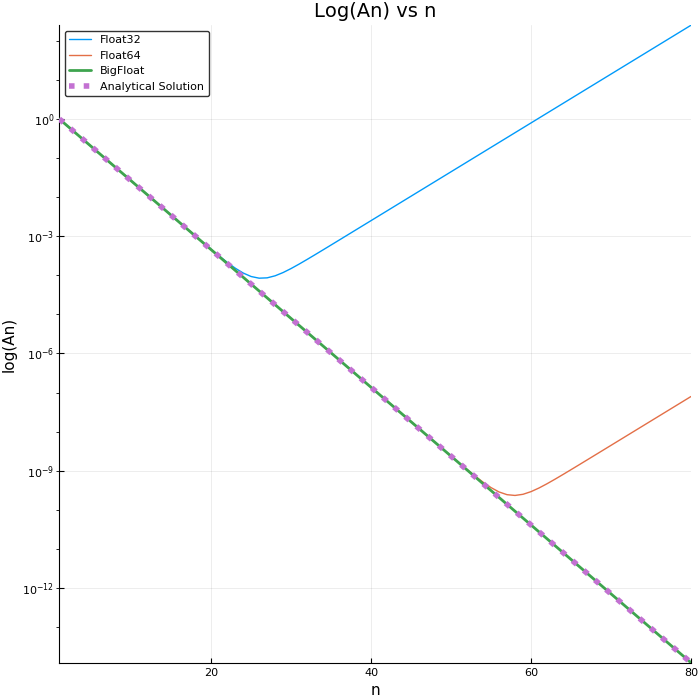

In [3]:
#Analytical Solution
n = 1:N
sol = (2/3).^(n-1)

#plotting

default(size=(700,700))
plot(1:N,a,yscale=:log10, label = "Float32", title="Log(An) vs n", xlabel = "n",ylabel = "log(An)")
plot!(1:N,b,yscale=:log10, label = "Float64")
plot!(1:N,c,yscale=:log10, label = "BigFloat",linewidth = 2)
plot!(1:N,sol,yscale=:log10, label = "Analytical Solution",line=:(dot),linewidth = 4)

### Finding the general analytical solution with $\epsilon$ perturbation.

With initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$ the previous system of equations is modified to.
  \begin{cases}
    1=C_{1}(\frac{2}{3})+C_{2}(\frac{4}{3})      &  \\
    \frac{2}{3}+\epsilon = C_{1}(\frac{2}{3})^{2} + C_{2}(\frac{4}{3})^{2} 
  \end{cases}

Solving the system of equations $C_{1} = \frac{6-9\epsilon}{4}$ and $C_{2}=\frac{9\epsilon}{8}$ so the solution given the initial conditions is.

$a_{n} = (\frac{2}{3})^{n-1} + \epsilon(\frac{9}{8}(\frac{4}{3})^{n}-\frac{9}{4}(\frac{2}{3})^{n})$

where the first term in the expression represent the analytical solution found earlier, but the second term is a perturbation that grows as n increases so when n tends to infinity, it doesn't matter how small the initial $\epsilon$ is, the solution will diverge compared to the actual analytical solution.

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



<font color=blue>
Excellent answer.
</font>

<font color=blue>
15/15
</font>

In [4]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [5]:
#1. verification of function
n = 20
m = 25
A = collect(1:n)
B = collect(n+1:n+m)
mergepresorted(A,B)

45-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 34
 35
 36
 37
 38
 39
 40
 41
 42
 43
 44
 45

In [6]:
m = 3
n = 2 ^ m
B= rand(1:n,n)
println("without arranging")
println(B)
println("arranged")
println(mergesort(B))

without arranging
[8, 5, 8, 1, 7, 8, 3, 6]
arranged
[1, 3, 5, 6, 7, 8, 8, 8]


### Analysis of merge sort algorithm

To analyze the algorithm we'll split into its main part

**Divide:** The divide step just computes the middle of the subarray, which takes constant time and doesn't depend of the size of the size of the array.

**Conquer:** We recursively solve two subproblems, each of size $n/2$, which contributes $2T(n/2)$ to the running time. 

**Combine:** Assuming that the two subarrays have already been sorted, the merge part of the algorithm is just choosing the smaller number at the beginning of each subarray (left or right) and place it in the merged array. We repeat this until the subarrays are merged. Since que are comparing just two subarrays and we are performing at most n basic steps, merging takes $n$.

If the subarray has 1 element then the problem reached to the base case where it has to sort a subarray of size 1  $F(1) = 1$.

So the computational complexity, $F(n)$, of the mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.

Introducing the variable p defined by $n = 2^p$ and $b_p = F(2^p)$ the above equation takes the form.
> $b_p = 2 b_{p−1} + 2^p$

To calculate the initial conditions we use $1=2^p$ so p must be 0 for the initial condition $b_{0}=1$.

### Solution of the recurssion

The solution of the previous linear recurring relation is the following. First we'll find the homogeneous solution of the recurssion with an ansatz  $b_p = x^p$

> $b_p = 2 b_{p−1}$

> $x^p = 2 x^{p-1}$ so, dividing the expression by $x^{p-1}$ we get that $x=2$ 

the homogenous solution will be $b_{p} = C2^p$ where C is an arbitrary constant.

To solve a particular solution we'll use $b_p = Ap2^p$ since a solution of the type $b_p = A2^p$ won't work.

> $Ap2^p-2A(p-1)2^{p-1}=2^p$ , dividing by $2^{p-1}$ we get
> $2Ap-2A(p-1)=2$ where A = 1

The general solution is $b_{p}=p2^{p}+C2^{p}$, but with the initial condition $b_{0}=1$, C must be 1

### Proof of computational complexity.

reeplazing back to the original solution with $n=2^{p}$ and therefore $p=\frac{log(n)}{log(2)}$. we get the following expression.

> $F(n) = n+n\frac{log(n)}{log(2)}$ which in Big-O notation, nlog(n) represents the higher degree of the expression, so.

> $F(n) = O(n\, \log n)$.


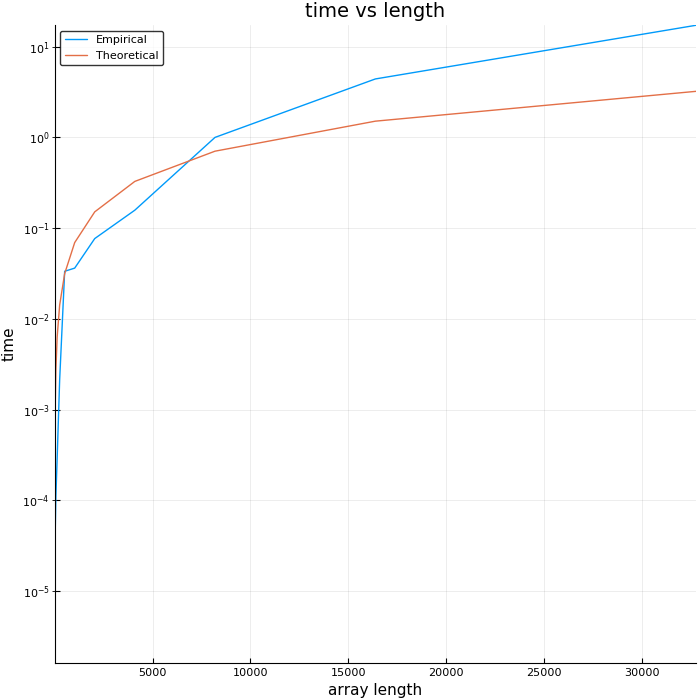

In [7]:
m = 15
time = zeros(m)
step = zeros(m)

for i = 1:m
    B= rand(1:2^i,2^i)
    step[i] = 2^i
    time[i] = (@timed mergesort(B))[2]
end

theo = zeros(m)

for i = 1:m
    theo[i] = (2^i)*(log(2^i)/log(2))+2^i
end


plot(step,time, title="time vs length", xlabel = "array length",ylabel = "time", label="Empirical",yaxis=:log)
plot!(step,theo.*time[1], label = "Theoretical")

<font color=blue>
Good answer but the plot would be clearer if you used a log-log scale since you would be able to see that the scaling is almost linear.
</font>

<font color=blue>
13/15
</font>